In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
LambdaCDM_settings = {'omega_b':0.0223828,
                     #'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                      'Omega_m':0.309883043,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1
                    }

neutrino_mass_settings = {'N_ur':0.00441,
                          'N_ncdm':3,
                          'm_ncdm':'0.10,0.10,0.10'
                         }

different_n_mass_settings = {'N_ur':0.00441,
                    'N_ncdm':3,
                    'm_ncdm':'0.05,0.05,0.05'
                   }

In [3]:
neutrino_mass_settings

{'N_ur': 0.00441, 'N_ncdm': 3, 'm_ncdm': '0.10,0.10,0.10'}

In [4]:
LambdaCDM = Class()
LambdaCDM.set(LambdaCDM_settings)
LambdaCDM.compute()

neutrino = Class()
neutrino.set(LambdaCDM_settings)
neutrino.set(neutrino_mass_settings)
neutrino.compute()

different_n = Class()
different_n.set(LambdaCDM_settings)
different_n.set(different_n_mass_settings)
different_n.compute()

In [5]:
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc

Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
Pk_neutrino = np.zeros(len(kk))
Pk_different_n = np.zeros(len(kk))

h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

for i,k in enumerate(kk):
    Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)
    Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)
    Pk_different_n[i] = different_n.pk(k*h,0.)*h**3 # function .pk(k,z)

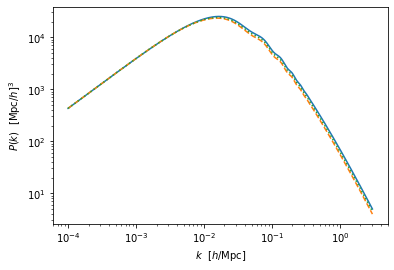

In [6]:
plt.figure()
plt.loglog(kk,Pk_LambdaCDM)
plt.loglog(kk,Pk_neutrino,linestyle='--')
plt.loglog(kk,Pk_different_n,linestyle=':')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.show()

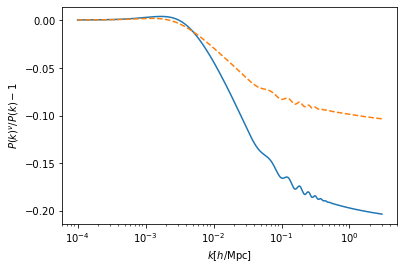

In [7]:
plt.figure()
plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
plt.semilogx(kk,Pk_different_n/Pk_LambdaCDM-1,linestyle='--')
plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)^\nu/P(k)-1$')
plt.show()

In [8]:
def dict_results(spectrum):
    Dict_S = {'age': spectrum.age(),
        'Neff': spectrum.Neff(),
        'omega_b': spectrum.omega_b(),
        'Omega0_cdm':spectrum.Omega0_cdm(),
        'h':spectrum.h(),
        'Omega0_k':spectrum.Omega0_k(),
        'Omega0_m': spectrum.Omega0_m(),
        'Omega_b': spectrum.Omega_b(),
        'Omega_g': spectrum.Omega_g(),
        'Omega_lambda': spectrum.Omega_Lambda(),
        'Omega_m': spectrum.Omega_m(),
        'Omega_r': spectrum.Omega_r(),
        'rs_drag': spectrum.rs_drag(),
        'Sigma8': spectrum.sigma8(),
        'Sigma8_cb': spectrum.sigma8_cb(),
        'T_cmb': spectrum.T_cmb(),
        'theta_s_100': spectrum.theta_s_100(),
        'theta_star_100': spectrum.theta_star_100(),  
        'n_s':spectrum.n_s(),
        'tau_reio':spectrum.tau_reio()
         }
    return Dict_S


In [9]:
dict_n = dict_results(neutrino)
dict_L = dict_results(LambdaCDM)
dict_new_n = dict_results(different_n)


In [10]:
print(dict_n)

{'age': 13.772626992285515, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.2542009850557419, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.3098827866245965, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900631216258057, 'Omega_m': 0.3098827866245965, 'Omega_r': 5.4091749597715606e-05, 'rs_drag': 147.87138690781677, 'Sigma8': 0.751382799249013, 'Sigma8_cb': 0.7665731054414945, 'T_cmb': 2.7255, 'theta_s_100': 1.0463849911419107, 'theta_star_100': 1.048776091013032, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [11]:
print(dict_L)

{'age': 13.77059773438602, 'Neff': 3.0439999999999996, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.26120569320189113, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.30988304299999997, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900259955434282, 'Omega_m': 0.30988304299999997, 'Omega_r': 9.09614565717917e-05, 'rs_drag': 147.0713806675917, 'Sigma8': 0.8250562050450522, 'Sigma8_cb': 0.8250562050450522, 'T_cmb': 2.7255, 'theta_s_100': 1.0417961948352972, 'theta_star_100': 1.0441437202320782, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [12]:
print(dict_n['age'])

13.772626992285515


In [13]:
print(dict_new_n)

{'age': 13.772520205023781, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.2577031468597545, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.30988253031580143, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900631216258057, 'Omega_m': 0.30988253031580143, 'Omega_r': 5.4348058392819485e-05, 'rs_drag': 147.48382222507118, 'Sigma8': 0.789244655799039, 'Sigma8_cb': 0.797772953969187, 'T_cmb': 2.7255, 'theta_s_100': 1.0439067921421883, 'theta_star_100': 1.046277797348064, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [14]:
np.savez('lambda_model', k1 = kk , Pk_L = Pk_LambdaCDM, L_output = dict_L)
np.savez('neutrino_model', k2 = kk, Pk_n = Pk_neutrino, n_output = dict_n)
np.savez('n_new_model', k3 = kk, Pk_new = Pk_different_n, new_output = dict_new_n)

In [15]:
data = np.load("lambda_model.npz")
print(data.files)

K_array1 = data['k1']
L_array = data['Pk_L']

['k1', 'Pk_L', 'L_output']


In [16]:
data = np.load("neutrino_model.npz")
print(data.files)

K_array2 = data['k2']
neu_array = data['Pk_n']

['k2', 'Pk_n', 'n_output']


In [17]:
data = np.load("n_new_model.npz")
print(data.files)

K_array3 = data['k3']
new_n_array = data['Pk_new']

['k3', 'Pk_new', 'new_output']


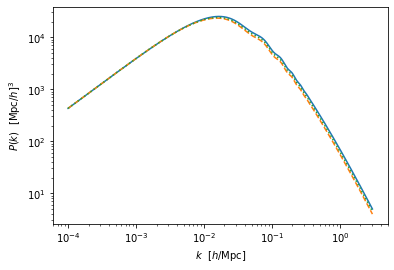

In [18]:
plt.figure()
plt.loglog(K_array1,L_array)
plt.loglog(K_array2,neu_array,linestyle='--')
plt.loglog(K_array3,new_n_array,linestyle=':')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.show()

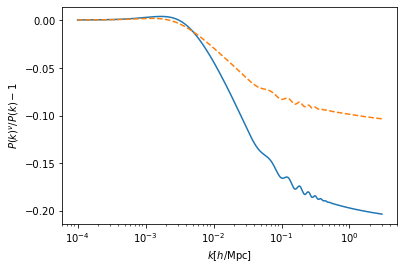

In [19]:
plt.figure()
plt.semilogx(K_array1,neu_array/L_array-1)
plt.semilogx(K_array1,new_n_array/L_array-1,linestyle='--')
plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)^\nu/P(k)-1$')
plt.show()